In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.10f' % x)
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('assignment_data.csv', index_col=0)
df.head()

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
0,GK-11-377000658,141,541541952.0000000000,GO-SEND-WEB,2021-01-09 00:04:35.600785+00:00,NaN
1,GK-11-377000660,141,541860727.0000000000,GO-SEND-WEB,2021-01-09 00:04:36.042753+00:00,NaN
2,GK-11-377001095,141,700871170.0000000000,GO-SEND-WEB,2021-01-09 00:08:43.994586+00:00,NaN
3,GK-11-377001557,141,541614894.0000000000,GO-SEND-WEB,2021-01-09 00:12:49.208030+00:00,NaN
4,GK-11-377002123,141,541213672.0000000000,GO-SEND-WEB,2021-01-09 00:17:34.530810+00:00,NaN


In [3]:
print ('The data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The data has 5820463 rows and 6 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820463 entries, 0 to 5820462
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   order_no      object 
 1   customer_id   int64  
 2   driver_id     float64
 3   service_type  object 
 4   booking_time  object 
 5   actual_gmv    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 310.8+ MB


In [5]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = df[df.duplicated()]
print("Duplicate Rows:", duplicate.shape[0])

Duplicate Rows: 1164094


In [6]:
df = df.drop_duplicates()
print("No of Rows after dropping duplicate rows:", df.shape[0])

No of Rows after dropping duplicate rows: 4656369


In [7]:
## check missing values
df.columns[df.isnull().any()]

Index(['driver_id', 'actual_gmv'], dtype='object')

In [8]:
## missing value counts in each of these columns
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

driver_id    0.1153037914
actual_gmv   0.5869171880
dtype: float64

In [9]:
df['actual_gmv'] = df['actual_gmv'].fillna(0)
df['driver_id'] = df['driver_id'].fillna(-1)

In [10]:
df['booking_time'] = pd.to_datetime(df['booking_time'])
df['booking_date'] = df['booking_time'].dt.date
df['booking_date'] = df['booking_date'].astype(str)
df['booking_month'] = df['booking_time'].dt.strftime('%Y-%m')

In [11]:
df.head()

,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv,booking_date,booking_month
0,GK-11-377000658,141,541541952.0000000000,GO-SEND-WEB,2021-01-09 00:04:35.600785+00:00,0.0000000000,2021-01-09,2021-01
1,GK-11-377000660,141,541860727.0000000000,GO-SEND-WEB,2021-01-09 00:04:36.042753+00:00,0.0000000000,2021-01-09,2021-01
2,GK-11-377001095,141,700871170.0000000000,GO-SEND-WEB,2021-01-09 00:08:43.994586+00:00,0.0000000000,2021-01-09,2021-01
3,GK-11-377001557,141,541614894.0000000000,GO-SEND-WEB,2021-01-09 00:12:49.208030+00:00,0.0000000000,2021-01-09,2021-01
4,GK-11-377002123,141,541213672.0000000000,GO-SEND-WEB,2021-01-09 00:17:34.530810+00:00,0.0000000000,2021-01-09,2021-01


In [12]:
(df['service_type'].value_counts() / df.shape[0]) * 100

GO-PULSA              6.8723075856
GO-FOOD               6.8723075856
GO-RIDE               6.8723075856
GO-CAR                6.8723075856
GO-BILLS              6.7736040679
GO-SHOP               6.7551347413
GO-CAR-BIRD           6.7546193182
GO-SEND               6.7287407849
GO-CAR-XTRA           6.7125908621
GO-KILAT              6.6912222807
GO-MART               6.6575479735
GO-FOOD-PICKUP        6.6321633874
GO-KILAT-SAMEDAY      6.5307753745
GO-SEND-SAMEDAY       5.0127041049
GO-BLUEBIRD           4.0348391633
GO-BOX                1.1861602893
GO-SEND-WEB           0.7500908970
GO-TIX                0.7454091375
GO-SEND-INTERCITY     0.4845191607
GO-SEND-WEB-SAMEDAY   0.0606481144
Name: service_type, dtype: float64

In [13]:
(df['booking_month'].value_counts() / df.shape[0]) * 100

2021-01   98.6392830981
2020-12    1.3607169019
Name: booking_month, dtype: float64

In [14]:
df['driver_id'].value_counts()

0.0000000000            670113
-1.0000000000           536897
700402028.0000000000       285
700439533.0000000000       267
700344087.0000000000       259
                         ...  
541840091.0000000000         1
541110414.0000000000         1
540548350.0000000000         1
540969612.0000000000         1
541339358.0000000000         1
Name: driver_id, Length: 329888, dtype: int64

In [15]:
df[df['driver_id'] == 0]['service_type'].value_counts()

GO-PULSA    320000
GO-BILLS    315404
GO-TIX       34709
Name: service_type, dtype: int64

In [16]:
df[df['driver_id'] == -1]['service_type'].value_counts()

GO-FOOD-PICKUP         308818
GO-CAR                  42102
GO-CAR-XTRA             38524
GO-FOOD                 25888
GO-BLUEBIRD             25883
GO-SEND-INTERCITY       22561
GO-SEND-SAMEDAY         22276
GO-SHOP                 17266
GO-RIDE                 17189
GO-MART                  5491
GO-BOX                   4877
GO-SEND                  3207
GO-KILAT-SAMEDAY         1929
GO-CAR-BIRD               550
GO-KILAT                  207
GO-SEND-WEB                78
GO-SEND-WEB-SAMEDAY        51
Name: service_type, dtype: int64

In [17]:
df['customer_id'].value_counts()

2            271941
128          189274
8             86041
12            39787
141           37751
              ...  
592540478         1
668029754         1
697379637         1
571505439         1
549081269         1
Name: customer_id, Length: 1948568, dtype: int64

In [18]:
df[df['customer_id'].isin([2,128,8,12])]['service_type'].value_counts()

GO-KILAT            297103
GO-KILAT-SAMEDAY    289940
Name: service_type, dtype: int64

In [19]:
## actual_gmv distribution
df['actual_gmv'].describe()

count    4656369.0000000000
mean       28019.3794439401
std        78276.1672529983
min            0.0000000000
25%            0.0000000000
50%            0.0000000000
75%        32000.0000000000
max     14000000.0000000000
Name: actual_gmv, dtype: float64

In [20]:
## Capping the outlier rows with Percentiles
upper_lim = df.groupby('service_type')['actual_gmv'].quantile(.95).reset_index()
upper_lim = upper_lim.rename({"actual_gmv": "upper_lim"}, axis=1)

df['upper_lim'] = df['service_type'].map(upper_lim.set_index('service_type')['upper_lim'])
df['actual_gmv'] = np.where(df['actual_gmv'] > df['upper_lim'], df['upper_lim'], df['actual_gmv'])

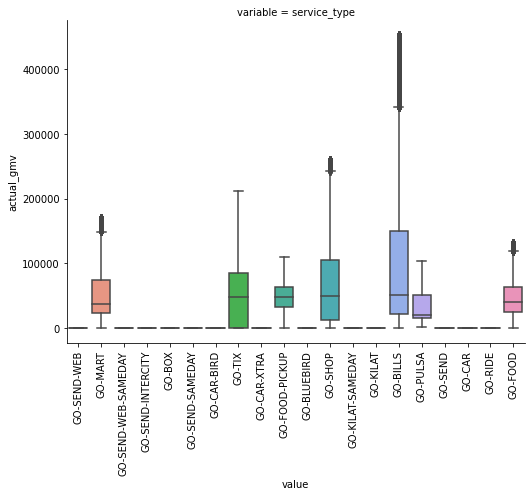

In [21]:
## actual_gmv & service_type 
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = ['service_type']
p = pd.melt(df, id_vars='actual_gmv', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=7)
g = g.map(boxplot, 'value','actual_gmv')
g

### 1. What fraction of the drivers deliver only food orders on 2021-01-20?

In [22]:
## fraction of the drivers deliver only food orders on 2021-01-20 ?
## count distinct drivers on 2021-01-20 and amount spend > 0 ?
driver = df[(~df['driver_id'].isin([0,-1])) & (df['booking_date'] == '2021-01-20') & (df['actual_gmv'] > 0)]
count_driver = len(driver['driver_id'].drop_duplicates())
driver_food = driver[(driver['service_type'].str.contains(pat = 'FOOD') == True)]
count_driver_food = len(driver_food['driver_id'].drop_duplicates())
fraction_drivers_food = round((count_driver_food / count_driver) * 100, 2)

print('Distinct number of drivers on 2021-01-20:', count_driver)
print('Distinct number of food order drivers on 2021-01-20:', count_driver_food)
print('Fraction of the drivers deliver only food orders on 2021-01-20:', str(fraction_drivers_food) + "%")

Distinct number of drivers on 2021-01-20: 21073
Distinct number of food order drivers on 2021-01-20: 8626
Fraction of the drivers deliver only food orders on 2021-01-20: 40.93%


### Which customer cohorts should the Marketing team prioritize first?

In [23]:
## RFM Analysis
## RECENCY (R): Days since last purchase
##FREQUENCY (F): Total number of purchases
## MONETARY VALUE (M): Total money this customer spent

In [24]:
df['booking_date'].min()

'2020-12-31'

In [25]:
df['booking_date'].max()

'2021-01-31'

In [26]:
## service types with amount spend > 0
service = df[df['actual_gmv'] > 0]['service_type'].drop_duplicates().tolist()
service

['GO-MART',
 'GO-TIX',
 'GO-FOOD-PICKUP',
 'GO-SHOP',
 'GO-BILLS',
 'GO-PULSA',
 'GO-FOOD']

In [27]:
## Considering current date: 2021-02-01
NOW = dt.datetime(2021,2,1)
df['recency'] = (NOW - pd.to_datetime(df['booking_date'])).dt.days
rfm = df[df['service_type'].isin(service)].groupby(['service_type','customer_id']).agg({'recency': lambda x: x.min(), 'order_no': lambda x: x.count(), 'actual_gmv': lambda x: x.sum()})
rfm.rename(columns={'order_no': 'frequency', 'actual_gmv': 'monetary_value'}, inplace=True)
rfm = rfm.reset_index()
upper_lim = rfm.groupby('service_type')['monetary_value'].quantile(.95).reset_index()
upper_lim = upper_lim.rename({"monetary_value": "upper_lim"}, axis=1)

rfm['upper_lim'] = rfm['service_type'].map(upper_lim.set_index('service_type')['upper_lim'])
rfm['monetary_value'] = np.where(rfm['monetary_value'] > rfm['upper_lim'], rfm['upper_lim'], rfm['monetary_value'])
rfm.head()

,service_type,customer_id,recency,frequency,monetary_value,upper_lim
0,GO-BILLS,110668,6,1,101500.0000000000,525000.0000000000
1,GO-BILLS,110909,20,1,365167.0000000000,525000.0000000000
2,GO-BILLS,111262,7,1,23829.0000000000,525000.0000000000
3,GO-BILLS,111429,23,1,396970.0000000000,525000.0000000000
4,GO-BILLS,111489,12,1,452500.0000000000,525000.0000000000


<AxesSubplot:xlabel='frequency', ylabel='Density'>

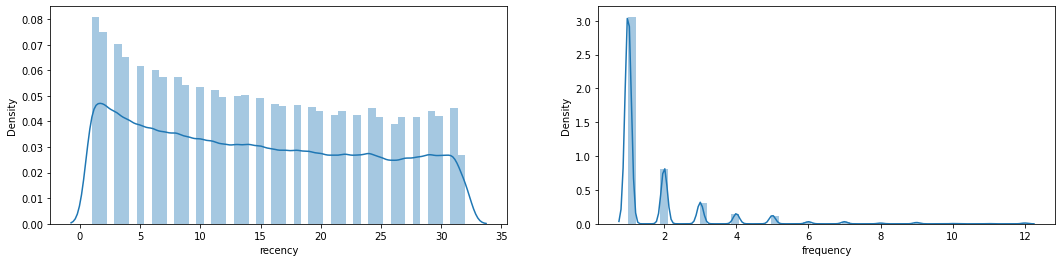

In [28]:
upper_lim = rfm.groupby('service_type')['frequency'].quantile(.98).reset_index()
upper_lim = upper_lim.rename({"frequency": "upper_lim"}, axis=1)

rfm['upper_lim'] = rfm['service_type'].map(upper_lim.set_index('service_type')['upper_lim'])
rfm['frequency'] = np.where(rfm['frequency'] > rfm['upper_lim'], rfm['upper_lim'], rfm['frequency'])
del rfm['upper_lim']
## recency, ## frequency
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 4))
sns.distplot(rfm['recency'],ax=ax[0])
sns.distplot(rfm['frequency'],ax=ax[1])

In [29]:
quantiles = rfm[['service_type', 'recency', 'frequency', 'monetary_value']].groupby(['service_type']).quantile(q=[0.25,0.5,0.75])
quantiles

recency    frequency    monetary_value
service_type                                                            
GO-BILLS       0.2500000000  6.0000000000 1.0000000000  51500.0000000000
               0.5000000000 13.0000000000 1.0000000000 101500.0000000000
               0.7500000000 22.0000000000 2.0000000000 217217.0000000000
GO-FOOD        0.2500000000  7.0000000000 1.0000000000  30000.0000000000
               0.5000000000 15.0000000000 1.0000000000  50000.0000000000
               0.7500000000 23.0000000000 2.0000000000  91000.0000000000
GO-FOOD-PICKUP 0.2500000000  6.0000000000 1.0000000000  40750.0000000000
               0.5000000000 13.0000000000 1.0000000000  70000.0000000000
               0.7500000000 21.0000000000 2.0000000000 120960.0000000000
GO-MART        0.2500000000  6.0000000000 1.0000000000  31500.0000000000
               0.5000000000 14.0000000000 1.0000000000  61200.0000000000
               0.7500000000 22.0000000000 2.0000000000 120900.0000000000
GO-PULSA       0.2500000000  7.0000000000 1.0000000000  15356.0000000000
               0.5000000000 15.0000000000 1.0000000000  30712.0000000000
               0.7500000000 24.0000000000 2.0000000000  75000.0000000000
GO-SHOP        0.2500000000  6.0000000000 1.0000000000  40000.0000000000
               0.5000000000 13.0000000000 1.0000000000  87500.0000000000
               0.7500000000 22.0000000000 2.0000000000 180000.0000000000
GO-TIX         0.2500000000  2.0000000000 1.0000000000      0.0000000000
               0.5000000000 13.0000000000 1.0000000000  55000.0000000000
               0.7500000000 25.0000000000 2.0000000000 132000.0000000000

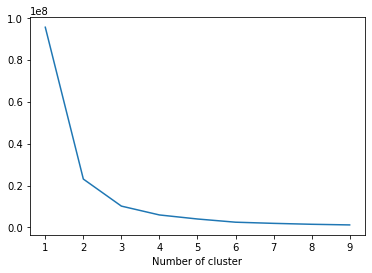

In [30]:
sse={}
rfm_recency = rfm[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(rfm_recency)
    rfm_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm[['recency']])
rfm['recency_cluster'] = kmeans.predict(rfm[['recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

rfm = order_cluster('recency_cluster', 'recency', rfm, False)
rfm.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,249230.0000000000,27.8533683746,2.5207247548,24.0000000000,26.0000000000,28.0000000000,30.0000000000,32.0000000000
1,243425.0000000000,19.4269323200,2.2901137611,16.0000000000,17.0000000000,19.0000000000,21.0000000000,23.0000000000
2,282279.0000000000,11.3879176276,2.3047583530,8.0000000000,9.0000000000,11.0000000000,13.0000000000,15.0000000000
3,319297.0000000000,3.7691741545,2.0050310618,1.0000000000,2.0000000000,4.0000000000,5.0000000000,7.0000000000


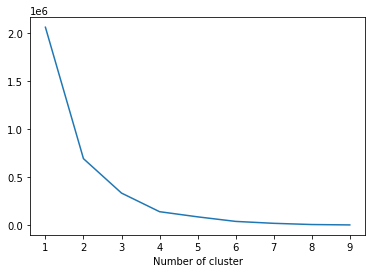

In [32]:
sse={}
rfm_frequency = rfm[['frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(rfm_frequency)
    rfm_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm[['frequency']])
rfm['frequency_cluster'] = kmeans.predict(rfm[['frequency']])

## order the frequency cluster
rfm = order_cluster('frequency_cluster', 'frequency',rfm,True)
rfm.groupby('frequency_cluster')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,736693.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000
1,267852.0000000000,2.2771866553,0.4476102785,2.0000000000,2.0000000000,2.0000000000,3.0000000000,3.0000000000
2,71542.0000000000,4.6084817310,0.6634886014,4.0000000000,4.0000000000,5.0000000000,5.0000000000,6.0000000000
3,18144.0000000000,8.6130401235,1.7505230233,7.0000000000,7.0000000000,8.0000000000,9.0000000000,12.0000000000


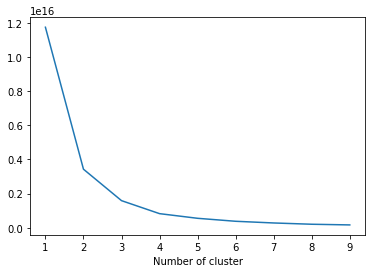

In [34]:
sse={}
rfm_monetary = rfm[['monetary_value']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(rfm_monetary)
    rfm_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [35]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm[['monetary_value']])
rfm['monetary_cluster'] = kmeans.predict(rfm[['monetary_value']])

## order the frequency cluster
rfm = order_cluster('monetary_cluster', 'monetary_value',rfm,True)
rfm.groupby('monetary_cluster')['monetary_value'].describe()

,count,mean,std,min,25%,50%,75%,max
monetary_cluster,,,,,,,,
0,617321.0000000000,34011.0016587804,18519.9875527224,0.0000000000,20500.0000000000,32000.0000000000,50000.0000000000,71566.0000000000
1,311311.0000000000,109284.9988789346,27051.9029077675,71577.0000000000,87000.0000000000,103410.0000000000,131000.0000000000,173212.0000000000
2,111993.0000000000,237297.2452296126,44580.6280722269,173230.0000000000,201500.0000000000,220400.0000000000,270800.0000000000,337200.0000000000
3,53606.0000000000,437203.3100772302,55694.9664029583,337250.0000000000,391500.0000000000,452500.0000000000,460000.0000000000,525000.0000000000


In [36]:
# Calculate average values for each rfm score, and return a size of each segment 
rfm['rfm_score'] = rfm['recency_cluster'] + rfm['frequency_cluster'] + rfm['monetary_cluster']
rfm_agg = rfm.groupby('rfm_score').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
}).round(1).reset_index()

rfm_agg['%'] = (rfm_agg[('monetary_value','count')] / rfm_agg[('monetary_value','count')].sum()) * 100
rfm_agg

rfm_score       recency    frequency    monetary_value                     %
                     mean         mean              mean   count              
0         0 27.9000000000 1.0000000000  32653.1000000000  140878 12.8746123990
1         1 22.4000000000 1.1000000000  51934.6000000000  189611 17.3282423912
2         2 15.7000000000 1.2000000000  61070.6000000000  214891 19.6385406738
3         3  9.4000000000 1.3000000000  72780.5000000000  236581 21.6207546670
4         4  8.9000000000 1.9000000000 125392.6000000000  134949 12.3327706855
5         5  7.6000000000 2.6000000000 179734.7000000000   81759  7.4718226773
6         6  6.4000000000 3.4000000000 249679.3000000000   47678  4.3572152498
7         7  5.0000000000 4.5000000000 311146.3000000000   27567  2.5193035109
8         8  4.6000000000 6.4000000000 390828.2000000000   12260  1.1204215563
9         9  2.9000000000 9.4000000000 415853.1000000000    8057  0.7363161892

In [37]:
rfm['cohort'] = 'Green'
rfm.loc[rfm['rfm_score']>2,'cohort'] = 'Bronze' 
rfm.loc[rfm['rfm_score']>4,'cohort'] = 'Silver'
rfm.loc[rfm['rfm_score']>6,'cohort'] = 'Gold'
rfm.loc[rfm['rfm_score']>8,'cohort'] = 'Platinum'

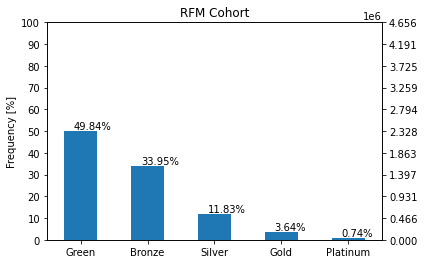

In [38]:
plt.figure(figsize = (6,4))
plt.title('RFM Cohort')
plt.ylabel('Frequency [%]')

ax = (rfm.cohort.value_counts()/len(rfm)*100).plot(kind = "bar", rot = 0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

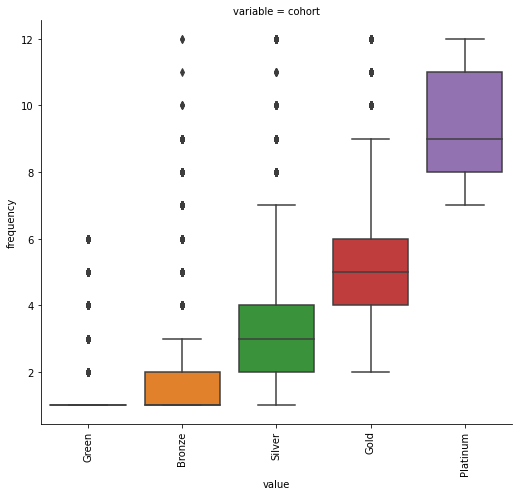

In [39]:
## cohort and recency & frequency
## actual_gmv & service_type 
grouped = rfm.loc[:,['frequency', 'cohort']].groupby(['cohort']).mean().sort_values(by='frequency')
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y,order=grouped.index)
            x = plt.xticks(rotation=90)

cat = ['cohort']
p = pd.melt(rfm, id_vars='frequency', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=7)
g = g.map(boxplot, 'value','frequency')
g

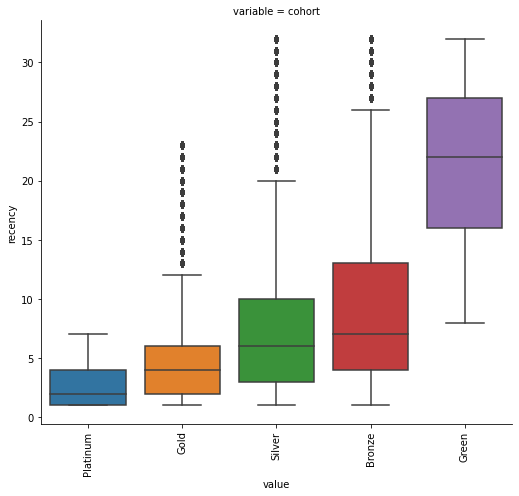

In [40]:
grouped = rfm.loc[:,['recency', 'cohort']].groupby(['cohort']).mean().sort_values(by='recency')
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y,order=grouped.index)
            x = plt.xticks(rotation=90)

cat = ['cohort']
p = pd.melt(rfm, id_vars='recency', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=7)
g = g.map(boxplot, 'value','recency')
g

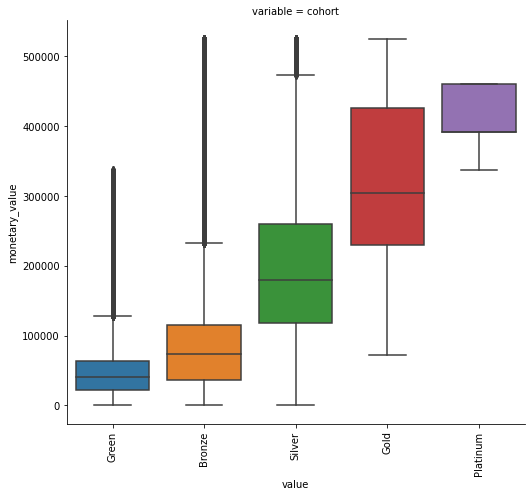

In [41]:
grouped = rfm.loc[:,['monetary_value', 'cohort']].groupby(['cohort']).mean().sort_values(by='monetary_value')
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y,order=grouped.index)
            x = plt.xticks(rotation=90)

cat = ['cohort']
p = pd.melt(rfm, id_vars='monetary_value', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=7)
g = g.map(boxplot, 'value','monetary_value')
g

In [42]:
## Marketing should prioritize the gold and platinum cohorts

### 3. Hypothesize how Gojek might leverage the insights gained from the data to generate higher transaction volumes.

In [43]:
## To generate higher transaction volumes, 
## marketing team should by giving rewards to the above cohorts which would bring more conversions than others

In [44]:
rfm_agg = rfm.groupby('rfm_score').agg({'monetary_value': ['mean', 'count']}).round(1).reset_index()
rfm_agg['monetary_value/count'] = (rfm_agg[('monetary_value','mean')] / rfm_agg[('monetary_value','count')]) * 100
rfm_agg['monetary_value/count above'] = (rfm_agg[('monetary_value','mean')][::-1].cumsum() / rfm_agg[('monetary_value','count')][::-1].cumsum()) * 100
rfm_agg

rfm_score    monetary_value         monetary_value/count  \
                         mean   count                        
0         0  32653.1000000000  140878        23.1782819177   
1         1  51934.6000000000  189611        27.3900775799   
2         2  61070.6000000000  214891        28.4193381761   
3         3  72780.5000000000  236581        30.7634594494   
4         4 125392.6000000000  134949        92.9185099556   
5         5 179734.7000000000   81759       219.8347582529   
6         6 249679.3000000000   47678       523.6782163681   
7         7 311146.3000000000   27567      1128.6911887402   
8         8 390828.2000000000   12260      3187.8319738989   
9         9 415853.1000000000    8057      5161.3888544123   

  monetary_value/count above  
                              
0             172.8221006351  
1             194.9351289606  
2             236.5308310922  
3             318.0124842626  
4             535.6371729593  
5             872.5653475900  
6            1431.0153617547  
7            2334.4490852895  
8            3970.4744794999  
9            5161.3888544123

<AxesSubplot:xlabel='rfm_score'>

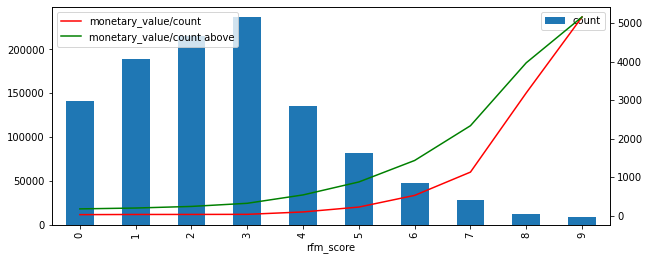

In [45]:
## monetary_value/count if operated above this threshold
db = rfm_agg
db['count'] = db[('monetary_value','count')]
fig, ax = plt.subplots(figsize=(10,4))
ax2 = ax.twinx()
db.plot(x='rfm_score', y='monetary_value/count', ax=ax2, color = 'red')
db.plot(x='rfm_score', y='monetary_value/count above', ax=ax2, color = 'green')
db.plot(x='rfm_score', y='count', ax=ax, kind='bar')